## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
# LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
# MOMENTUM = 0.95
LEARNING_RATE = 1e-1
MOMENTUM = [0.95, 0.9, 0.85, 0.8, 0.75]


In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mm in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.2f" % (mm))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mm)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-mm-%s" % str(mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with momentum = 0.95
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: nan - accu

Epoch 1/50
196/196 [==============================] - 4s 20ms/step - loss: 2.0614 - accuracy: 0.2460 - val_loss: 1.8851 - val_accuracy: 0.3135
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 1.8260 - accuracy: 0.3401 - val_loss: 1.7340 - val_accuracy: 0.3764
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 1.7380 - accuracy: 0.3736 - val_loss: 1.8375 - val_accuracy: 0.3474
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6852 - accuracy: 0.3928 - val_loss: 1.9175 - val_accuracy: 0.3230
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6782 - accuracy: 0.3992 - val_loss: 1.6559 - val_accuracy: 0.4092
Epoch 6/50
196/196 [==============================] - 3s 18ms/step - loss: 1.6415 - accuracy: 0.4104 - val_loss: 1.6351 - val_accuracy: 0.4096
Epoch 7/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5981 - accuracy: 0.4260 - val_loss: 1.6726 - val_accuracy: 0.4132

Epoch 1/50
196/196 [==============================] - 4s 21ms/step - loss: 2.1731 - accuracy: 0.1909 - val_loss: 2.0102 - val_accuracy: 0.2355
Epoch 2/50
196/196 [==============================] - 3s 18ms/step - loss: 1.9652 - accuracy: 0.2735 - val_loss: 2.0007 - val_accuracy: 0.2409
Epoch 3/50
196/196 [==============================] - 3s 18ms/step - loss: 1.8761 - accuracy: 0.3066 - val_loss: 1.8104 - val_accuracy: 0.3437
Epoch 4/50
196/196 [==============================] - 3s 18ms/step - loss: 1.7882 - accuracy: 0.3495 - val_loss: 1.9415 - val_accuracy: 0.3206
Epoch 5/50
196/196 [==============================] - 3s 18ms/step - loss: 1.7304 - accuracy: 0.3705 - val_loss: 1.6813 - val_accuracy: 0.3945
Epoch 6/50
196/196 [==============================] - 4s 18ms/step - loss: 1.6639 - accuracy: 0.3979 - val_loss: 1.6413 - val_accuracy: 0.4029
Epoch 7/50
196/196 [==============================] - 4s 18ms/step - loss: 1.6223 - accuracy: 0.4137 - val_loss: 1.6305 - val_accuracy: 0.4111

Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss: 2.2158 - accuracy: 0.1778 - val_loss: 2.2611 - val_accuracy: 0.1532
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 2.0307 - accuracy: 0.2467 - val_loss: 1.9561 - val_accuracy: 0.2800
Epoch 3/50
196/196 [==============================] - 3s 18ms/step - loss: 1.8247 - accuracy: 0.3420 - val_loss: 1.7614 - val_accuracy: 0.3688
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 1.7401 - accuracy: 0.3740 - val_loss: 1.7200 - val_accuracy: 0.3792
Epoch 5/50
196/196 [==============================] - 3s 18ms/step - loss: 1.6799 - accuracy: 0.3982 - val_loss: 1.7874 - val_accuracy: 0.3718
Epoch 6/50
196/196 [==============================] - 4s 18ms/step - loss: 1.6195 - accuracy: 0.4206 - val_loss: 1.7724 - val_accuracy: 0.3770
Epoch 7/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5884 - accuracy: 0.4336 - val_loss: 1.8312 - val_accuracy: 0.3646

Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss: 2.1430 - accuracy: 0.2114 - val_loss: 2.0937 - val_accuracy: 0.2305
Epoch 2/50
196/196 [==============================] - 3s 18ms/step - loss: 1.9230 - accuracy: 0.3008 - val_loss: 1.8825 - val_accuracy: 0.3260
Epoch 3/50
196/196 [==============================] - 3s 18ms/step - loss: 1.8660 - accuracy: 0.3214 - val_loss: 1.8421 - val_accuracy: 0.3253
Epoch 4/50
196/196 [==============================] - 4s 18ms/step - loss: 1.7673 - accuracy: 0.3647 - val_loss: 1.7156 - val_accuracy: 0.3845
Epoch 5/50
196/196 [==============================] - 4s 18ms/step - loss: 1.6948 - accuracy: 0.3899 - val_loss: 1.7128 - val_accuracy: 0.3916
Epoch 6/50
196/196 [==============================] - 4s 18ms/step - loss: 1.6536 - accuracy: 0.4075 - val_loss: 1.8182 - val_accuracy: 0.3624
Epoch 7/50
196/196 [==============================] - 4s 18ms/step - loss: 1.6044 - accuracy: 0.4240 - val_loss: 1.7021 - val_accuracy: 0.3871

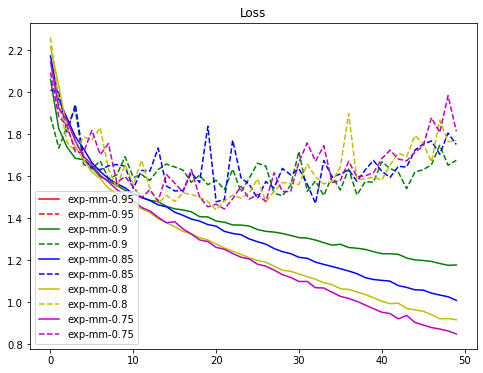

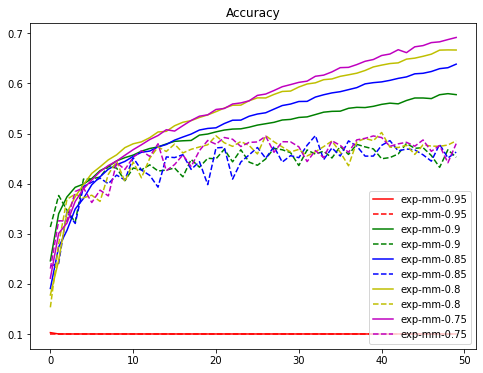

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mm in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.2f" % (mm))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mm)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-mm-%s" % str(mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with momentum = 0.95
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss: 2.0176 - a

Experiment with momentum = 0.90
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 2.0501 - a

Experiment with momentum = 0.85
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 3s 17ms/step - loss: 1.9484 - a

Experiment with momentum = 0.80
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 3s 17ms/step - loss: 2.0126 - a

196/196 [==============================] - 4s 18ms/step - loss: 0.8606 - accuracy: 0.6865 - val_loss: 1.7317 - val_accuracy: 0.4898
Experiment with momentum = 0.75
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________

Epoch 50/50
196/196 [==============================] - 4s 18ms/step - loss: 0.7580 - accuracy: 0.7259 - val_loss: 1.7796 - val_accuracy: 0.4979


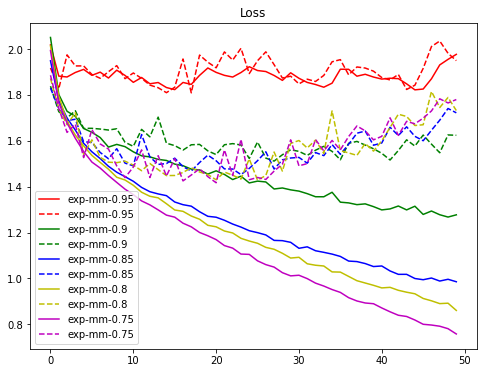

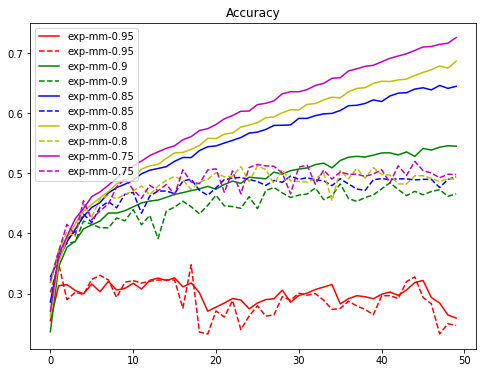

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
# 以此例來說，nesterov=False的準確率較高，且使用數值較小的momentum，準確率也較高。